In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [255]:
rfm = pd.read_csv("rfm_values.csv")
rfm

,Row Labels,Max of lastgiftdate,Max of Clicks,Average of lastgiftamount,R,F,M
0,0005594841fc31e96d4effe7d45a50a3,6/28/20,0,103,5,0,7
1,0009bdef3e9a9343ab9c623590c21e81,1/0/00,2,0,0,8,0
2,000cd5998d3240c2f024404b5f55b8ee,3/17/21,0,26,8,0,5
3,000e4142749d0cd729db979970a5f304,6/11/20,0,517,5,0,9
4,001357ff7750fea56f6313989f2dbf22,11/9/20,0,52,6,0,6
...,...,...,...,...,...,...,...
17333,ffec11bdae9b0715fd64e17fc0f2cc03,1/0/00,0,0,0,0,0
17334,ffec5f0fe1004282e09f30fe87fedc28,1/0/00,0,0,0,0,0
17335,ffee1a7fe37ad8fb01f2f7d6a55dd59a,1/0/00,0,0,0,0,0
17336,ffeeb15cf0022ff414c176d005b9e767,12/23/20,0,103,8,0,7


In [256]:
rfm = rfm.rename(columns={"Row Labels": "id", "Max of lastgiftdate": "Most Recent Donation Date", "Max of Clicks": "Max Clicks", "Average of lastgiftamount": "Average Donation"})
rfm

,id,Most Recent Donation Date,Max Clicks,Average Donation,R,F,M
0,0005594841fc31e96d4effe7d45a50a3,6/28/20,0,103,5,0,7
1,0009bdef3e9a9343ab9c623590c21e81,1/0/00,2,0,0,8,0
2,000cd5998d3240c2f024404b5f55b8ee,3/17/21,0,26,8,0,5
3,000e4142749d0cd729db979970a5f304,6/11/20,0,517,5,0,9
4,001357ff7750fea56f6313989f2dbf22,11/9/20,0,52,6,0,6
...,...,...,...,...,...,...,...
17333,ffec11bdae9b0715fd64e17fc0f2cc03,1/0/00,0,0,0,0,0
17334,ffec5f0fe1004282e09f30fe87fedc28,1/0/00,0,0,0,0,0
17335,ffee1a7fe37ad8fb01f2f7d6a55dd59a,1/0/00,0,0,0,0,0
17336,ffeeb15cf0022ff414c176d005b9e767,12/23/20,0,103,8,0,7


In [257]:
#most loyal subscribers
r_7 = rfm[rfm["R"]>7]
f_7 = rfm[rfm["F"]>7]
m_7 = rfm[rfm["M"]>7]
rfm_7 = rfm[(rfm["R"]>7) & (rfm["F"]>7) & (rfm["M"]>7)] 
rfm_7

,id,Most Recent Donation Date,Max Clicks,Average Donation,R,F,M
171,02af93a5852cb4106da70a635e53ed2e,12/9/21,3,209,9,8,9
323,04d669b9a5953b9b3fd3aca835f492d6,12/26/21,20,206,9,9,9
368,05b2a488c0494232d4bfef79ef3b7b14,12/18/21,19,258,9,9,9
470,078db37541860dec1a0801d9b47d9e7f,11/30/21,12,206,9,9,9
509,080ebfd5fb9b38dd4ce18d75935c44ef,5/21/21,10,207,8,9,9
...,...,...,...,...,...,...,...
16908,fa12a4e0b7814f1775ea05781be1d8da,9/6/22,7,106,9,9,9
16966,fad3a457f5915d4d10da12101d3b3861,7/19/22,7,106,9,9,9
17041,fbefdb172a978eace8d7d7ae315ddb50,11/9/21,3,209,9,8,9
17074,fc4e2282026e0ef893b47899e98959f5,6/17/22,8,265,9,9,9


In [258]:
#semi-loyal 
r_4 = rfm[(rfm["R"]>=4) & (rfm["R"]<7)]
f_4 = rfm[(rfm["F"]>=4) & (rfm["F"]<7)] #this contains no rows
m_4 = rfm[(rfm["M"]>=4) & (rfm["M"]<7)]
rfm_4 = rfm[(rfm["R"]>=4) & (rfm["R"]<7) & (rfm["M"]>=4) & (rfm["M"]<7)]
rfm_4

,id,Most Recent Donation Date,Max Clicks,Average Donation,R,F,M
4,001357ff7750fea56f6313989f2dbf22,11/9/20,0,52,6,0,6
5,00164eecbf1fc728666f04f1c61a6ec8,6/11/20,0,52,5,0,6
9,001d3ceecf49d8203c2bfa1909a7a69b,5/5/20,0,10,4,0,4
10,001fe64c795ee64733143edd99fa512c,11/23/20,0,26,6,0,5
27,00807bfe5ad56b4d3a74e6643731a753,5/2/20,0,50,4,0,6
...,...,...,...,...,...,...,...
17311,ff80b52528d7e7a5aa90d4119dbbc73b,5/5/20,0,25,4,0,5
17315,ff8d24703aadad6ec63cac57d56c3b4e,7/13/20,0,10,6,0,4
17316,ff8d2d23820654b6ed3e20488d086a8c,5/5/20,0,25,4,0,5
17321,ff9f7a4d3255c8c3d5b4ace41207e538,6/23/20,0,21,5,0,4


In [259]:
#unreliable subscribers
r_0 = rfm[rfm["R"]<=3]
f_0 = rfm[rfm["F"]<=3]
m_0 = rfm[rfm["M"]<=3]
rfm_0 = rfm[(rfm["R"]<=3) & (rfm["F"]<=3) & (rfm["M"]<=3)] 
rfm_0

,id,Most Recent Donation Date,Max Clicks,Average Donation,R,F,M
6,001a94df17071f630bdc5e041a71934d,1/0/00,0,0,0,0,0
7,001bf978a3a452852c7f9c661e005bf4,1/0/00,0,0,0,0,0
8,001c537e6337fbf033533eeab0375189,1/0/00,0,0,0,0,0
11,00206f1cd47071fef584f095a31cde21,1/0/00,0,0,0,0,0
18,005e9a74e19e0114e40d0ae40e3d6559,1/0/00,0,0,0,0,0
...,...,...,...,...,...,...,...
17328,ffd59eb792b512cfca1848984e63bcf1,1/0/00,0,0,0,0,0
17330,ffe58c8121329d5f4f5dce8af657efa8,1/0/00,0,0,0,0,0
17333,ffec11bdae9b0715fd64e17fc0f2cc03,1/0/00,0,0,0,0,0
17334,ffec5f0fe1004282e09f30fe87fedc28,1/0/00,0,0,0,0,0


There are many people that have not donated, with and RFM category of 0. In fact, everyone who has a RFM of less than 3 has a RFM of 0:

In [260]:
#1-3
r_1 = rfm[(rfm["R"]>=1) & (rfm["R"]<3)]
f_1 = rfm[(rfm["F"]>=1) & (rfm["F"]<3)] #this contains no rows
m_1 = rfm[(rfm["M"]>=1) & (rfm["M"]<3)]
#rfm_4 = rfm[(rfm["R"]>=4) & (rfm["R"]<7) & (rfm["M"]>=4) & (rfm["M"]<7)]
r_1.shape, f_1.shape, m_1.shape #0 rows where rfm is between 1-3

((0, 7), (0, 7), (0, 7))

Are there any patterns within people who have an RFM category more than 7 (i.e. loyal)?

In [261]:
full_df = pd.read_csv("full_df.csv")
full_df

,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,89ce7fad62fd5b95aaadaa1edb786cc0,subscribed,112,3,2,200,0,200,4/23/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,4/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
2,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,4/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
3,cec49095c9aef6252fbd30aae5345792,subscribed,112,29,2,200,0,200,4/23/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
4,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,4/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18368,e8a15faf47a94501f30df33272fc03fd,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
18369,e23b9602b47f4417221dca835e623b87,subscribed,99,217,66,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
18370,bd3f2052fd4fc563391a7da2237bf44f,subscribed,105,42,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
18371,17f59717c69ed9b0e1076d343da875a7,subscribed,104,167,7,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN


In [262]:
full_df.groupby("MonetaryTier").agg("count")

,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,DonorStatus,IndividualDonorType,Tier3Classification
MonetaryTier,,,,,,,,,,,,,
Diamond,5326,5326,5326,5326,5326,5326,5326,5326,5326,5326,5326,5326,5326
Gold,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835
MonetaryTier,1,1,1,1,1,1,1,1,1,1,1,1,1
Other,324,324,324,324,324,324,324,324,4,324,324,5,59
Platinum,1823,1823,1823,1823,1823,1823,1823,1823,1823,1823,1823,1823,1823
Silver,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716


In [263]:
loyal = rfm_7.merge(full_df, how="inner", on="id")
loyal

,id,Most Recent Donation Date,Max Clicks,Average Donation,R,F,M,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,02af93a5852cb4106da70a635e53ed2e,12/9/21,3,209,9,8,9,subscribed,110,11,3,726,0,209,12/9/2021,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations
1,04d669b9a5953b9b3fd3aca835f492d6,12/26/21,20,206,9,9,9,subscribed,113,356,20,0,0,206,12/26/2021,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations
2,05b2a488c0494232d4bfef79ef3b7b14,12/18/21,19,258,9,9,9,subscribed,87,202,19,0,0,258,12/18/2021,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations
3,078db37541860dec1a0801d9b47d9e7f,11/30/21,12,206,9,9,9,subscribed,110,88,12,0,0,206,11/30/2021,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations
4,080ebfd5fb9b38dd4ce18d75935c44ef,5/21/21,10,207,8,9,9,subscribed,110,117,10,0,0,207,5/21/2021,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,fa12a4e0b7814f1775ea05781be1d8da,9/6/22,7,106,9,9,9,subscribed,113,11,7,0,421,106,9/6/2022,Donor,Diamond,SingleDonor,Multiple Single Donations,Multiple Single Donations
234,fad3a457f5915d4d10da12101d3b3861,7/19/22,7,106,9,9,9,subscribed,79,261,7,106,106,106,7/19/2022,Donor,Diamond,SingleDonor,Single Donor,Single Donor
235,fbefdb172a978eace8d7d7ae315ddb50,11/9/21,3,209,9,8,9,subscribed,87,138,3,519,0,209,11/9/2021,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations
236,fc4e2282026e0ef893b47899e98959f5,6/17/22,8,265,9,9,9,subscribed,91,50,8,678,368,265,6/17/2022,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations


In [264]:
#most loyals are subscribed
len(loyal[loyal["status"] == "subscribed"]) / len(loyal) * 100

89.49579831932773

In [265]:
#All loyals are mostly Platinum or Diamond (Assuming Platinum is higher since avg donation is higher for plat)
loyal.groupby("MonetaryTier").agg("count")[["id"]]

,id
MonetaryTier,
Diamond,61
Platinum,177


In [266]:
#most loyals have multiple single donations
len(loyal[loyal["IndividualDonorType"] == "Multiple Single Donations"]) / len(loyal) * 100

86.1344537815126

### Summary:
- If a user has a RFM greater than 7 (recent donations, clicks a lot, donate a lot), they likely also:
    - are subscribed
    - are of diamond or platinum tier
    - have multiple single donations
    
For these people, we can send many newsletters/donation emails, and chances are they will donate.

What about moderate users with an RFM of 4-6?

In [267]:
moderate = rfm_4.merge(full_df, how="inner", on="id")
moderate
#way more rows/people than loyal/high rfm

,id,Most Recent Donation Date,Max Clicks,Average Donation,R,F,M,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,001357ff7750fea56f6313989f2dbf22,11/9/20,0,52,6,0,6,subscribed,87,6,0,52,0,52,11/9/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
1,00164eecbf1fc728666f04f1c61a6ec8,6/11/20,0,52,5,0,6,unsubscribed,11,1,0,52,0,52,6/11/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
2,001d3ceecf49d8203c2bfa1909a7a69b,5/5/20,0,10,4,0,4,unsubscribed,0,0,0,10,0,10,5/5/2020,Donor,Silver,SingleDonor,Single Donor,Single Donor
3,001fe64c795ee64733143edd99fa512c,11/23/20,0,26,6,0,5,unsubscribed,1,1,0,26,0,26,11/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
4,00807bfe5ad56b4d3a74e6643731a753,5/2/20,0,50,4,0,6,subscribed,113,87,0,50,0,50,5/2/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,ff80b52528d7e7a5aa90d4119dbbc73b,5/5/20,0,25,4,0,5,unsubscribed,51,16,0,25,0,25,5/5/2020,Donor,Silver,SingleDonor,Single Donor,Single Donor
3030,ff8d24703aadad6ec63cac57d56c3b4e,7/13/20,0,10,6,0,4,unsubscribed,4,2,0,10,0,10,7/13/2020,Donor,Silver,SingleDonor,Single Donor,Single Donor
3031,ff8d2d23820654b6ed3e20488d086a8c,5/5/20,0,25,4,0,5,unsubscribed,0,0,0,25,0,25,5/5/2020,Donor,Silver,SingleDonor,Single Donor,Single Donor
3032,ff9f7a4d3255c8c3d5b4ace41207e538,6/23/20,0,21,5,0,4,unsubscribed,0,0,0,21,0,21,6/23/2020,Donor,Silver,SingleDonor,Single Donor,Single Donor


In [268]:
#about 50% are subscribed
len(moderate[moderate["status"] == "subscribed"]) / len(moderate) * 100

48.6156888595913

In [269]:
#A lot of moderate tiers (gold and silver)
moderate.groupby("MonetaryTier").agg("count")[["id"]]

,id
MonetaryTier,
Diamond,884
Gold,1079
Platinum,2
Silver,1069


In [270]:
#most moderate users use one-time donations rather than multiple single donations
len(moderate[moderate["IndividualDonorType"] == "Multiple Single Donations"]) / len(moderate) * 100

7.481872116018458

In [271]:
#all_rfm = moderate.merge(rfm_7, how="outer", on="id")
all_rfm = pd.concat([moderate, loyal])
all_rfm

,id,Most Recent Donation Date,Max Clicks,Average Donation,R,F,M,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,001357ff7750fea56f6313989f2dbf22,11/9/20,0,52,6,0,6,subscribed,87,6,0,52,0,52,11/9/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
1,00164eecbf1fc728666f04f1c61a6ec8,6/11/20,0,52,5,0,6,unsubscribed,11,1,0,52,0,52,6/11/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
2,001d3ceecf49d8203c2bfa1909a7a69b,5/5/20,0,10,4,0,4,unsubscribed,0,0,0,10,0,10,5/5/2020,Donor,Silver,SingleDonor,Single Donor,Single Donor
3,001fe64c795ee64733143edd99fa512c,11/23/20,0,26,6,0,5,unsubscribed,1,1,0,26,0,26,11/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
4,00807bfe5ad56b4d3a74e6643731a753,5/2/20,0,50,4,0,6,subscribed,113,87,0,50,0,50,5/2/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,fa12a4e0b7814f1775ea05781be1d8da,9/6/22,7,106,9,9,9,subscribed,113,11,7,0,421,106,9/6/2022,Donor,Diamond,SingleDonor,Multiple Single Donations,Multiple Single Donations
234,fad3a457f5915d4d10da12101d3b3861,7/19/22,7,106,9,9,9,subscribed,79,261,7,106,106,106,7/19/2022,Donor,Diamond,SingleDonor,Single Donor,Single Donor
235,fbefdb172a978eace8d7d7ae315ddb50,11/9/21,3,209,9,8,9,subscribed,87,138,3,519,0,209,11/9/2021,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations
236,fc4e2282026e0ef893b47899e98959f5,6/17/22,8,265,9,9,9,subscribed,91,50,8,678,368,265,6/17/2022,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations


In [272]:
all_rfm["RFM Score"] = all_rfm["R"] + all_rfm["F"] + all_rfm["M"]
all_rfm["Tier Number"] = all_rfm["MonetaryTier"]
all_rfm["Tier Number"].replace(["Platinum", "Diamond","Gold", "Silver"],
                        [1, 2, 3, 4], inplace=True)
all_rfm

,id,Most Recent Donation Date,Max Clicks,Average Donation,R,F,M,status,Sends,Opens,...,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification,RFM Score,Tier Number
0,001357ff7750fea56f6313989f2dbf22,11/9/20,0,52,6,0,6,subscribed,87,6,...,0,52,11/9/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor,12,2
1,00164eecbf1fc728666f04f1c61a6ec8,6/11/20,0,52,5,0,6,unsubscribed,11,1,...,0,52,6/11/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor,11,2
2,001d3ceecf49d8203c2bfa1909a7a69b,5/5/20,0,10,4,0,4,unsubscribed,0,0,...,0,10,5/5/2020,Donor,Silver,SingleDonor,Single Donor,Single Donor,8,4
3,001fe64c795ee64733143edd99fa512c,11/23/20,0,26,6,0,5,unsubscribed,1,1,...,0,26,11/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor,11,3
4,00807bfe5ad56b4d3a74e6643731a753,5/2/20,0,50,4,0,6,subscribed,113,87,...,0,50,5/2/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,fa12a4e0b7814f1775ea05781be1d8da,9/6/22,7,106,9,9,9,subscribed,113,11,...,421,106,9/6/2022,Donor,Diamond,SingleDonor,Multiple Single Donations,Multiple Single Donations,27,2
234,fad3a457f5915d4d10da12101d3b3861,7/19/22,7,106,9,9,9,subscribed,79,261,...,106,106,7/19/2022,Donor,Diamond,SingleDonor,Single Donor,Single Donor,27,2
235,fbefdb172a978eace8d7d7ae315ddb50,11/9/21,3,209,9,8,9,subscribed,87,138,...,0,209,11/9/2021,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations,26,1
236,fc4e2282026e0ef893b47899e98959f5,6/17/22,8,265,9,9,9,subscribed,91,50,...,368,265,6/17/2022,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations,27,1


In [273]:
all_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 0 to 237
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         3272 non-null   object
 1   Most Recent Donation Date  3272 non-null   object
 2   Max Clicks                 3272 non-null   int64 
 3   Average Donation           3272 non-null   int64 
 4   R                          3272 non-null   int64 
 5   F                          3272 non-null   int64 
 6   M                          3272 non-null   int64 
 7   status                     3272 non-null   object
 8   Sends                      3272 non-null   object
 9   Opens                      3272 non-null   object
 10  Clicks                     3272 non-null   object
 11  lifetodategiving           3272 non-null   object
 12  yeartodategiving           3272 non-null   object
 13  lastgiftamount             3272 non-null   object
 14  lastgiftd

In [274]:
#convert some to integers
all_rfm = all_rfm.astype({"Sends": "int", "Opens": "int", "Clicks": "int", "lifetodategiving": "int", 
                         "yeartodategiving": "int", "lastgiftamount": "int"})

/var/folders/02/lp673bk96gl_pm2qdyc0pqdw0000gn/T/ipykernel_41037/442041477.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


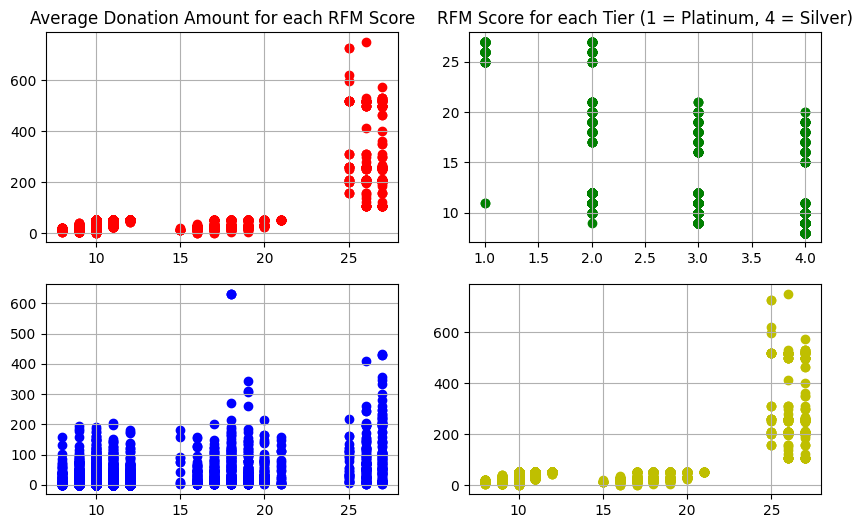

In [275]:
sns.scatterplot(data=all_rfm, x="RFM Score", y="Average Donation")

plt.rcParams["figure.figsize"] = (10,6) 

plt.subplot(2,2,1)
plt.scatter(all_rfm["RFM Score"],all_rfm["Average Donation"], c="r")
plt.grid()
plt.title("Average Donation Amount for each RFM Score")


plt.subplot(2,2,2)
plt.scatter(all_rfm["Tier Number"],all_rfm["RFM Score"] ,c="g")
plt.grid()
plt.title("RFM Score for each Tier (1 = Platinum, 4 = Silver)")


plt.subplot(2,2,3)
plt.scatter(all_rfm["RFM Score"],all_rfm["Opens"], c="b")
plt.grid()


plt.subplot(2,2,4)
plt.scatter(all_rfm["RFM Score"],all_rfm["lastgiftamount"], c="y")
plt.grid()

There seems to be 3 different groups for each scatterplot...

In [276]:
#Split the data
X = all_rfm[["Average Donation", "Opens", "lastgiftamount"]].values
y = all_rfm["RFM Score"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [277]:
#perform KNN
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [278]:
y_pred = classifier.predict(X_test)
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred)
precision, recall

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.33333333, 0.46280992, 0.46534653, 0.39805825, 0.53658537,
        0.        , 0.25      , 0.        , 0.33333333, 0.27272727,
        0.        , 1.        , 0.375     , 0.38888889, 0.57142857]),
 array([0.32258065, 0.56      , 0.59119497, 0.34745763, 0.65346535,
        0.        , 0.06666667, 0.        , 0.12      , 0.11538462,
        0.        , 0.25      , 0.5       , 0.41176471, 0.5       ]))

In [279]:
rfm_grouped = all_rfm.groupby("RFM Score").mean()
rfm_grouped["precision"] = precision
rfm_grouped["recall"] = recall
rfm_grouped[["precision", "recall"]]

/var/folders/02/lp673bk96gl_pm2qdyc0pqdw0000gn/T/ipykernel_41037/1432540763.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rfm_grouped = all_rfm.groupby("RFM Score").mean()


,precision,recall
RFM Score,,
8,0.333333,0.322581
9,0.462810,0.560000
10,0.465347,0.591195
11,0.398058,0.347458
12,0.536585,0.653465
15,0.000000,0.000000
16,0.250000,0.066667
17,0.000000,0.000000
18,0.333333,0.120000
